# Etude du marché: Entreprise française d'Agro-Alimentaire (2ème partie)

## Analyse Exploratoire des données

In [1]:
#Import des librairies Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Charger les données à analyser
df = pd.read_csv('data_df.csv')
df.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$)
0,Arménie,3072.0,97.33,43.24,0.236,3914.525246,3814.0,4169.0
1,Afghanistan,1997.0,54.09,12.21,2.356,513.085978,13573.0,26227.0
2,Albanie,3400.0,119.50,59.41,-0.050,4514.204908,7835.0,3266.0
3,Algérie,3345.0,92.85,24.98,1.987,4109.701336,136595.0,19051.0
4,Angola,2266.0,54.09,18.40,3.223,4095.811686,36500.0,1814.0


### **Classification Ascendente hiérarchique avec un Dendrogramme**

La classification ascendante hierarchique permet de partitionner nos données selon leur similairité afin de mieux les comprendre. Elle se présente sous forme d'arborescence appelée un **dendrogramme**. Cette méthode de clustering est généralement utilisée pour les petits échantillons. 


In [3]:
# Importer le module de clustering hierarchique de scikit-learn
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing

##### **Préparation des données pour le clustering hierarchique**

In [4]:
# Indexer le DataFrame selon le nom du pays 
df.set_index('Zone', inplace=True)

In [5]:
# Convertir les données en un objet array numpy
X = df.values
print(X.shape)

(170, 7)


In [6]:
# Sauvegarder les variables sous le nom 'names'
names = df.index

In [7]:
# Faire un Centrage-Reduction pour standariser les données
sdt_scale = preprocessing.StandardScaler().fit(X)
X_scaled = sdt_scale.transform(X) 

In [8]:
# Appliquer ensuite le Clustering hierarchique selon la méthode de Ward
Z = linkage(X_scaled, method='ward', metric='euclidean')

In [9]:
# Afficher les résultats grâce à la fonction 'plot_dendrogramme'

def plot_dendrogram(Z, names):
    plt.figure(figsize=(20,10))
    plt.title('Dendrogramme de clustering hierarchique')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        labels=names,
        color_threshold =10,
        orientation='top'
    )
    plt.savefig("Graphic/P9_04_dendrogramme.png")
    plt.show()

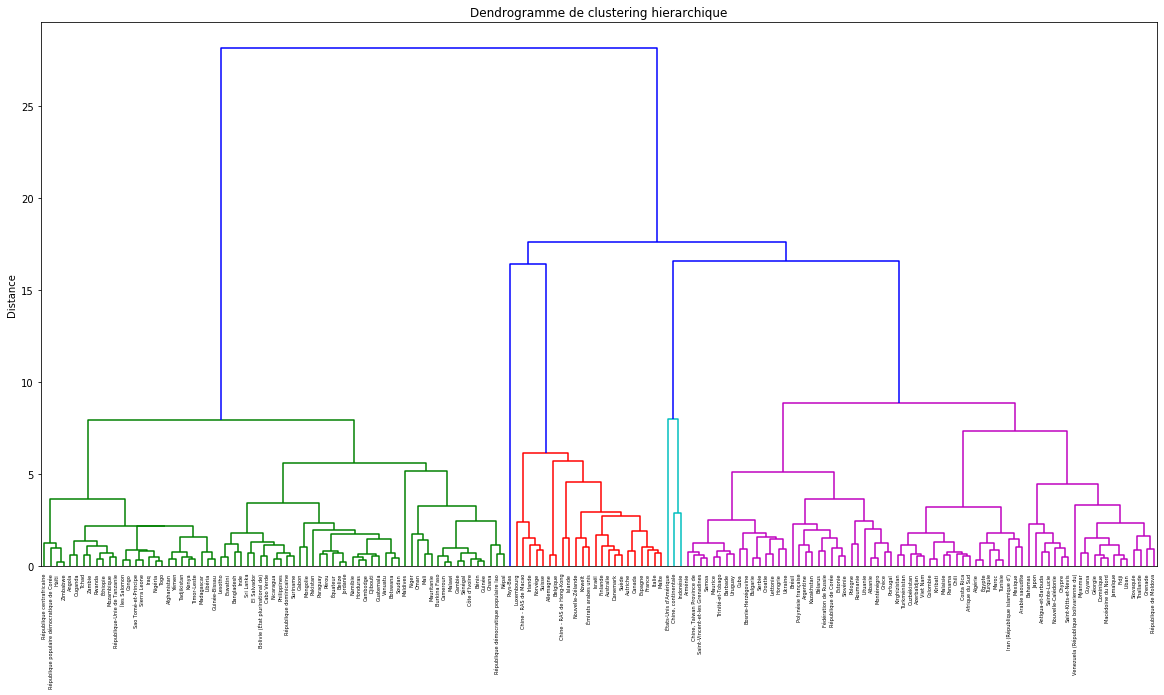

In [10]:
plot_dendrogram(Z, names)

--> Le Dendrogramme présente 5 clusters lorqu'on fait un découpage à une distance euclidienne =10. 

On va identifier les 5 clusters du dendrogramme pour mieux les comprendre

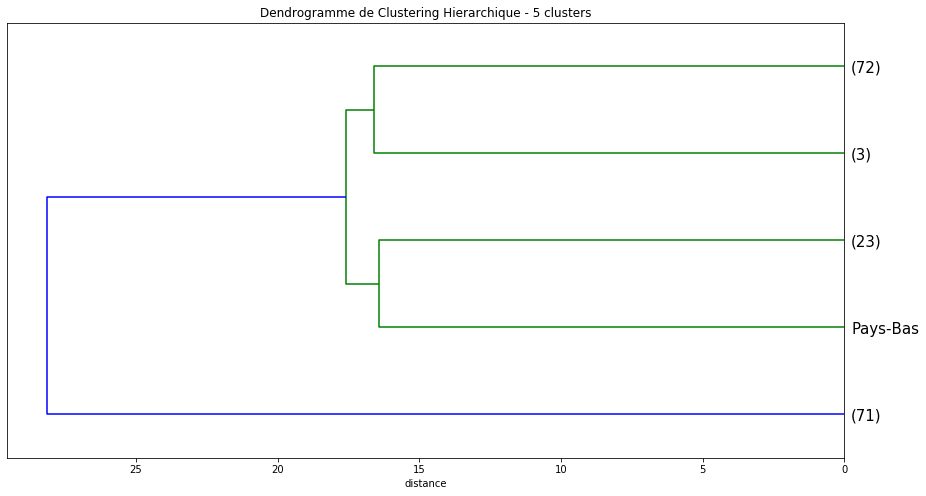

In [11]:
# Decouper le dendrogramme en 5 clusters 
fig = plt.figure(figsize=(15,8))
plt.title('Dendrogramme de Clustering Hierarchique - 5 clusters')
plt.xlabel('distance')

dendrogram(Z, labels = names, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')

plt.savefig("Graphic/P9_05_dendrogramme de Clustering Hierarchique - 5 clusters.png")
plt.show()

--> On constate que les 170 individus sont repartis en 5 groupes et dans chaque groupe les individus sont à peu près similaires. On remarque que l'un des 5 groupes contient un seul individus**Pays-Bas**

In [12]:
# Sauvegarder les numéros des groupes dans la variable 'groupe_clusters'
groupe_clusters = fcluster(Z, 5, criterion = 'maxclust')
print('Les numéros des groupes sont:'+str(np.unique(groupe_clusters)))

Les numéros des groupes sont:[1 2 3 4 5]


In [13]:
# Trier les index en fonction des groupes avec la fonction'np.argsort'
index_goup = np.argsort(groupe_clusters)

In [14]:
# Attribuer les noms des pays aux numeros de groupes dans le DataFrame 'aliment_df'
groupe_clusters_df = pd.DataFrame(df.index[index_goup],groupe_clusters[index_goup]).reset_index()
groupe_clusters_df = groupe_clusters_df.rename(columns = {'index':'Groupe'})
groupe_clusters_df.head()

,Groupe,Zone
0,1,République démocratique populaire lao
1,1,Népal
2,1,Namibie
3,1,Mozambique
4,1,Mongolie


In [15]:
# Vérifier si tous les groupes sont pris en compte
groupe_clusters_df['Groupe'].unique()

array([1, 2, 3, 4, 5])

--> Les individus de notre échantillons sont partitionnés en 5 groupes en fonction de leurs similarités. On va étudier maintenant les caractéristiques de chaque groupe que d'étudier chaque individus.

On fait une union de deux DataFrames **groupe_clusters_df' et 'df'** en un seul DataFrame qu'on va appeler **df_group**

In [16]:
# Faire une jointure des data frames 'groupe_clusters_df' et 'aliment_df'
df_group = df.merge(groupe_clusters_df, on = 'Zone')

In [17]:
# Identification rapide des 5 premières observations
df_group.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$),Groupe
0,Arménie,3072.0,97.33,43.24,0.236,3914.525246,3814.0,4169.0,5
1,Afghanistan,1997.0,54.09,12.21,2.356,513.085978,13573.0,26227.0,1
2,Albanie,3400.0,119.50,59.41,-0.050,4514.204908,7835.0,3266.0,5
3,Algérie,3345.0,92.85,24.98,1.987,4109.701336,136595.0,19051.0,5
4,Angola,2266.0,54.09,18.40,3.223,4095.811686,36500.0,1814.0,1


Après la constitution des classes, on calcule la moyenne de chaque groupe appelée **centroïde**. On reconstitue ainsi un nouvel échantillon avec les  **centroides des clusters.**

In [18]:
# Determiner le centroide de chaque cluster. 
df_group_1 = df_group[df_group['Groupe']==1]
df_group_2 = df_group[df_group['Groupe']==2]
df_group_3 = df_group[df_group['Groupe']==3]
df_group_4 = df_group[df_group['Groupe']==4]
df_group_5 = df_group[df_group['Groupe']==5]

On va identifier la liste de chaque groupe.

In [19]:
print(df_group_1['Zone'].unique(), df_group_1['Zone'].shape)

['Afghanistan' 'Angola' 'Bangladesh' 'Bolivie (État plurinational de)'
 'Botswana' 'Belize' 'Îles Salomon' 'Cameroun' 'Cabo Verde'
 'République centrafricaine' 'Sri Lanka' 'Tchad' 'Congo' 'Bénin'
 'République dominicaine' 'Équateur' 'El Salvador' 'Djibouti' 'Gabon'
 'Gambie' 'Ghana' 'Guatemala' 'Guinée' 'Haïti' 'Honduras' 'Inde' 'Iraq'
 "Côte d'Ivoire" 'Jordanie' 'Kenya' 'Cambodge'
 'République populaire démocratique de Corée'
 'République démocratique populaire lao' 'Lesotho' 'Libéria' 'Madagascar'
 'Malawi' 'Maldives' 'Mali' 'Mauritanie' 'Mongolie' 'Mozambique' 'Namibie'
 'Népal' 'Vanuatu' 'Nicaragua' 'Niger' 'Nigéria' 'Pakistan' 'Paraguay'
 'Pérou' 'Philippines' 'Guinée-Bissau' 'Timor-Leste' 'Zimbabwe' 'Rwanda'
 'Sao Tomé-et-Principe' 'Sénégal' 'Sierra Leone' 'Suriname' 'Tadjikistan'
 'Eswatini' 'République-Unie de Tanzanie' 'Togo' 'Oman' 'Ouganda'
 'Burkina Faso' 'Éthiopie' 'Yémen' 'Zambie' 'Soudan'] (71,)


In [20]:
print(df_group_2['Zone'].unique(), df_group_2['Zone'].shape)

['Australie' 'Autriche' 'Canada' 'Danemark' 'Finlande' 'France'
 'Allemagne' 'Chine - RAS de Hong-Kong' 'Islande' 'Irlande' 'Israël'
 'Italie' 'Koweït' 'Chine - RAS de Macao' 'Malte' 'Nouvelle-Zélande'
 'Norvège' 'Espagne' 'Suède' 'Suisse' 'Émirats arabes unis' 'Belgique'
 'Luxembourg'] (23,)


In [21]:
print(df_group_3['Zone'].unique(), df_group_3['Zone'].shape)

['Pays-Bas'] (1,)


In [22]:
print(df_group_4['Zone'].unique(), df_group_4['Zone'].shape)

['Chine, continentale' 'Indonésie' "États-Unis d'Amérique"] (3,)


In [23]:
print(df_group_5['Zone'].unique(), df_group_5['Zone'].shape)

['Arménie' 'Albanie' 'Algérie' 'Antigua-et-Barbuda' 'Argentine' 'Bahamas'
 'Barbade' 'Brésil' 'Bulgarie' 'Myanmar' 'Chili' 'Colombie' 'Costa Rica'
 'Cuba' 'Chypre' 'Azerbaïdjan' 'Dominique' 'Bélarus' 'Égypte' 'Estonie'
 'Fidji' 'Polynésie française' 'Géorgie' 'Bosnie-Herzégovine' 'Kiribati'
 'Grèce' 'Grenade' 'Guyana' 'Hongrie' 'Croatie'
 "Iran (République islamique d')" 'Kazakhstan' 'Jamaïque' 'Japon'
 'Kirghizistan' 'République de Corée' 'Lettonie' 'Liban' 'Lituanie'
 'Malaisie' 'Maurice' 'Mexique' 'Maroc' 'République de Moldova'
 'Nouvelle-Calédonie' 'Macédoine du Nord' 'Panama' 'Pologne' 'Portugal'
 'Roumanie' 'Fédération de Russie' 'Saint-Kitts-et-Nevis' 'Sainte-Lucie'
 'Saint-Vincent-et-les Grenadines' 'Arabie saoudite' 'Slovénie'
 'Slovaquie' 'Afrique du Sud' 'Turkménistan' 'Chine, Taiwan Province de'
 'Thaïlande' 'Trinité-et-Tobago' 'Tunisie' 'Turquie' 'Ukraine' 'Uruguay'
 'Ouzbékistan' 'Venezuela (République bolivarienne du)' 'Viet Nam' 'Samoa'
 'Serbie' 'Monténégro'] (72,)


On determine les moyenne des 5 groupes.Ces moyennes sont appelées des **centroïdes**. 

In [24]:
# Calculer ensuite les centroides
df_group.groupby(['Groupe']).mean()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$)
Groupe,,,,,,,
1,2466.084507,63.578028,19.560141,2.106761,2650.869671,6.510662e+04,3342.647887
2,3428.956522,109.550870,65.833043,0.862043,53149.042434,5.346839e+04,27635.173913
3,3251.000000,104.430000,75.760000,0.224000,48989.638816,1.051840e+05,787855.000000
4,3284.333333,94.560000,42.253333,0.735667,24205.757451,5.812679e+06,16057.666667
5,3026.097222,88.236250,43.280139,0.479611,11100.730348,1.141808e+05,9658.541667


--> Rappelons nous que notre analyse se focalise sur la **disponibilité de protéines animale** puisque faisons l'exportation de poulets. 


Pour bien percevoir cela, on fait une visualisation de la repartition des individus de chaque variable avec un Box Plot.

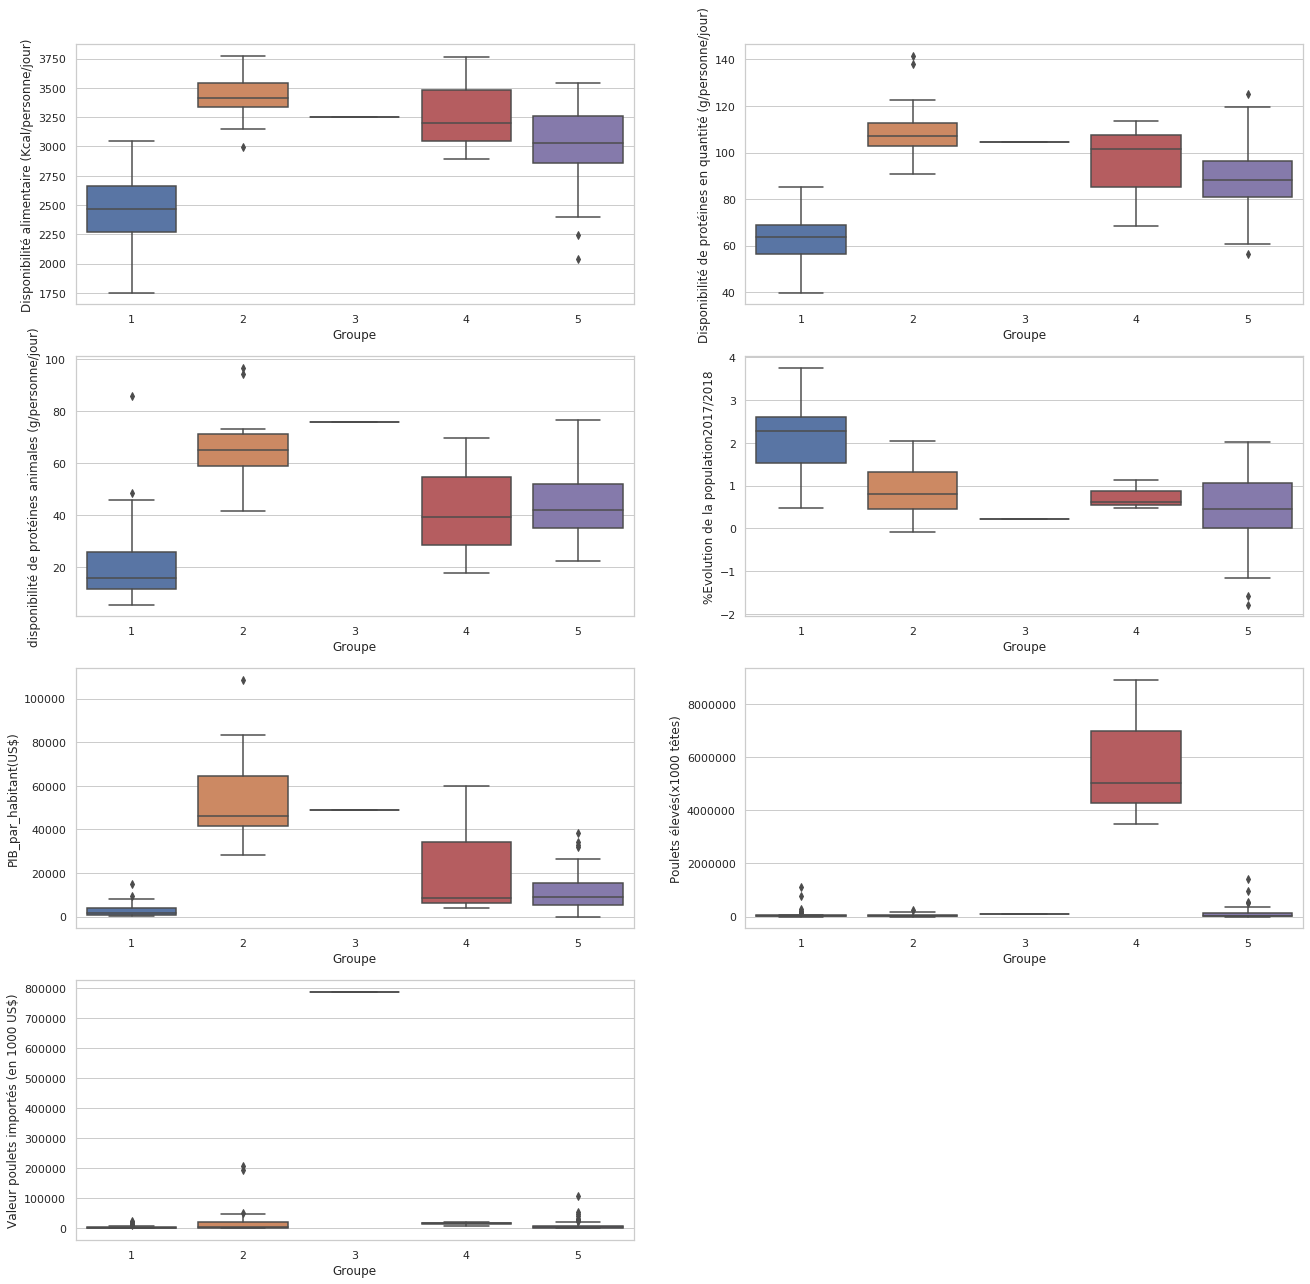

In [25]:
#Visualisation analytique avec boxplot
plt.figure(figsize = (22,22))
plt.title("Boxplot_dendrogramme")
sns.set(style='whitegrid')

plt.subplot(421)
sns.boxplot(data=df_group, x='Groupe', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(422)
sns.boxplot(data=df_group, x='Groupe', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(423)
sns.boxplot(data=df_group, x='Groupe', y='disponibilité de protéines animales (g/personne/jour)')

plt.subplot(424)
sns.boxplot(data=df_group, x='Groupe', y='%Evolution de la population2017/2018')

plt.subplot(425)
sns.boxplot(data=df_group, x='Groupe', y='PIB_par_habitant(US$)')

plt.subplot(426)
sns.boxplot(data=df_group, x='Groupe', y='Poulets élevés(x1000 têtes)')

plt.subplot(427)
sns.boxplot(data=df_group, x='Groupe', y='Valeur poulets importés (en 1000 US$)')

plt.savefig("Graphic/P9_06_Boxplot_dendrogramme.png")
plt.show(block=False)

--> On constate que les **groupes 2 et 3** ont les quantités moyennes les plus importantes en disponibilités alimentaires surtout en protéines animales et en PIB par habitant. Donc on retient ces deux groupes pour la suite de notre analyse. 

In [26]:
# Afficher la liste des groupes 3 et 5
print(f'Les pays des groupes 2 et 3  sont:')
print(df_group_2['Zone'].unique(), df_group_2['Zone'].shape)
print(df_group_3['Zone'].unique(), df_group_3['Zone'].shape)

Les pays des groupes 2 et 3  sont:
['Australie' 'Autriche' 'Canada' 'Danemark' 'Finlande' 'France'
 'Allemagne' 'Chine - RAS de Hong-Kong' 'Islande' 'Irlande' 'Israël'
 'Italie' 'Koweït' 'Chine - RAS de Macao' 'Malte' 'Nouvelle-Zélande'
 'Norvège' 'Espagne' 'Suède' 'Suisse' 'Émirats arabes unis' 'Belgique'
 'Luxembourg'] (23,)
['Pays-Bas'] (1,)


--> Le **Groupe 2** constitue **23 pays** et le **Groupe 3**  **un seul pays**

In [27]:
# Identifier la taille des groupes 2 et 3
df_group_2_3 = df_group.query('[2,3] in Groupe') 
df_group_2_3.shape

(24, 9)

In [28]:
# Observation rapides des 5 premiers échantillons
df_group_2_3.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$),Groupe
7,Australie,3307.0,108.01,71.69,1.259,57628.863849,95012.0,0.0,2
8,Autriche,3694.0,108.11,62.86,0.804,47306.411842,16736.0,32714.0,2
20,Canada,3492.0,101.33,54.70,0.924,44906.748920,170203.0,52627.0,2
34,Danemark,3383.0,112.92,69.81,0.345,57938.797728,20733.0,9861.0,2
43,Finlande,3337.0,117.77,73.03,0.203,46310.120883,8520.0,1212.0,2


--> La **Classification Ascendante Hierarchique** avec **un dendrogramme** a permis d'identifier au total **24 pays** qui pourraient être proposés pour la vente de nos poulets. 

--> On remarque aussi que le groupe 3 comprend un seul individu: **Pays-Bas**

On va affiner notre analyse en utilisant une autre méthode de clusterind des données qu'on appelle la méthode des centres mobiles ou **K-Means**. On va par la suite comparer ces deux méthodes. 

### **Repartition des données avec l'algorithme du K-means** 

Le clustering de K-Means est un algorithme itératif qui fonctionne en 2 étape:
- on se fixe un nombre k de clusters 
- chercher à trouver non pas un clustering hierarchique mais juste une séparation des données en k cluster de façon à minimiser la somme des variances intracluster.

In [29]:
# Importer le module de K-means 
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import cluster, metrics

##### **Préparation des données pour le K-means** 

In [30]:
# Rendre les données en objet de type np array
X = df.values
print (X.shape)

(170, 7)


In [31]:
#Centrage et réduction pour que les données soit normalisées 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
print(X_scaled.shape)

(170, 7)


On fait un clustering par K-means pour plusieurs plusieurs tailles de clusters. 
Pour chacune de ces tailles on va calculer le **coefficient de silhouettes** qui permet de choisir la taille de clusters la plus appropriée.

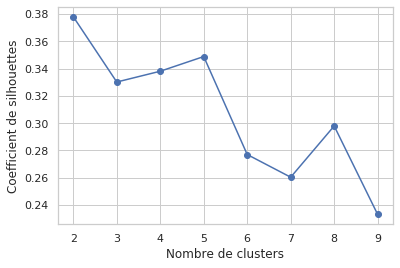

In [32]:
#Liste pour stocker les coefficients de silhouettes
silhouettes = []

# Boucle itérative de 2 à 10 clusters pour tester les possibilités
for num_clusters in range (2,10):
    cls = cluster.KMeans(n_clusters = num_clusters)
    cls.fit(X_scaled)

# Calcul et stockage des coefficients de silhouettes
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)

# Représenter graphiquement les silhouettes en fonction des clusters
plt.plot(range(2,10), silhouettes, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouettes")
plt.show()

--> Le coefficient de silhouettes decroit avec le nombre de clusters, mais augmente  à **K=5 et K=8**. 
Donc **une partition en 5 clusterings est appropriée à nos données** 

Le calcul de l'**inertie** va permettre d'obtenir de K optimal à partir duquel les données son conservées.

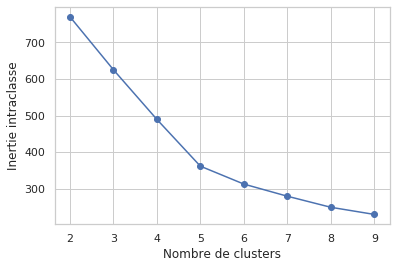

In [33]:
# Créons une liste pour stocker les inerties
inerties = []

# Boucle itérative de 2 à 10 clusters pour tester les possibilités
for k in range (2,10):
    km = cluster.KMeans(n_clusters = k)
    km.fit(X_scaled)

# Calcul et stockage des inerties intraclasse    
    inerties.append(km.inertia_)

# Représenter graphiquement les valeurs d'inertie en fonction des clusters   
plt.plot(range(2,10), inerties, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intraclasse")
plt.show()

--> Pour ne par perdre les données le nombre de clusters idéal est de **k=2**
Les valeurs de l'inertie intraclasse diminuent lorque le nombre de clusters augmente. 
**Avec la méthode du coude une partition en **k=5 clusters est optimal pour conserver l'intégrité des informations.**  
En plus ce choix est judicieux car il permettra de faire une comparaison avec les résultats du clustering hierarchique. 

In [34]:
#Clustering K-means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
#Donnons des etiquettes à ces clusters
#clusters_km3 = cls3.labels_
clusters_km5 = cls5.labels_ 

Pour regarder à quoi correspond les clusters on fait une Analyse en Composantes Principales pour projeter les données de l'échantillon sur 3 dimensions.

##### **ACP et projection des données de l'échatillon sur 3 dimensions**

In [36]:
# Utilliser le module 'decomposition' de sklearn
pca = decomposition.PCA(svd_solver = 'full')
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [37]:
#Pourcentage de variances expliquées 
print(pca.explained_variance_ratio_.cumsum())

[0.51366396 0.65647356 0.78830714 0.89683884 0.95888317 0.99050802
 1.        ]


--> On a **66% des données** qui sont expliquée par les **2 premières composantes.**  

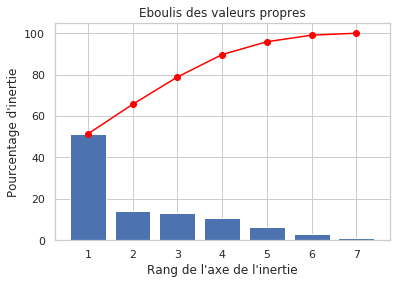

In [38]:
#Représentation graphique de la variance expliquée
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red', marker='o')

plt.xlabel("Rang de l'axe de l'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

--> On constate qu'avec les **2 premières composantes** nos données sont largement expliquées. 

Affichons les 5 clusters des individus sur le premier plan factoriel

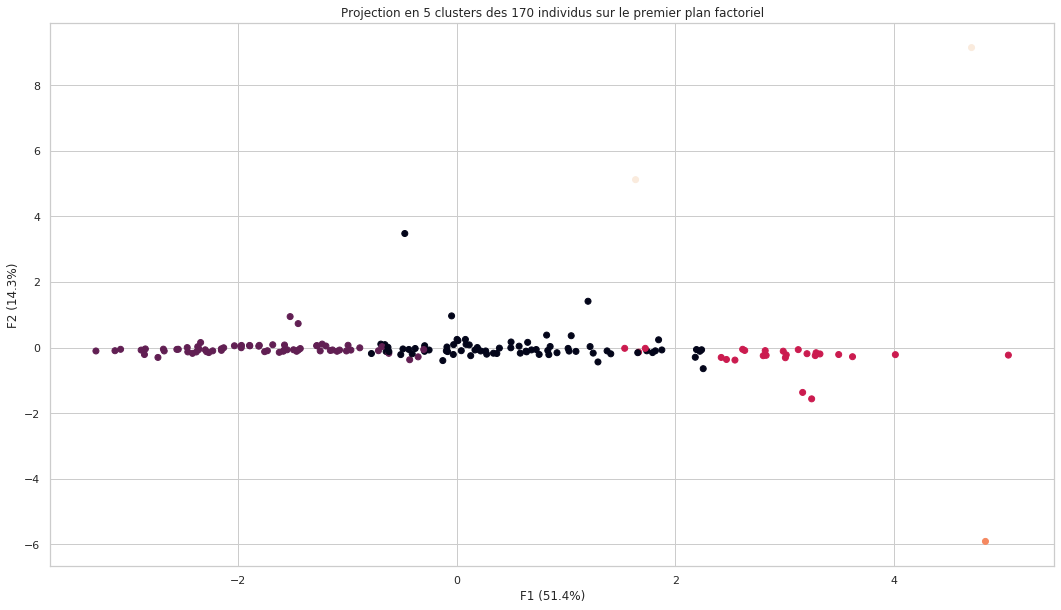

In [39]:
# Données projetées  
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(18,10))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls5.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le premier plan factoriel".format(X_projected.shape[0]))

plt.savefig("Graphic/P9_07_kmeans_5_clusters.png")
plt.show()

In [40]:
# Determiner les centroides des 5 clusters
centroids = cls5.cluster_centers_

In [41]:
# Attribuer les centroides des 5 clusters dans notre base de données de l'échantillon 
pd.DataFrame(centroids, columns = df.columns)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$)
0,0.359054,0.282138,0.217113,-0.612245,-0.184695,-0.029587,-0.071371
1,-0.914367,-0.897214,-0.829476,0.867294,-0.558555,-0.146222,-0.169502
2,1.278266,1.453859,1.465568,-0.460099,1.906782,-0.163241,0.191943
3,0.880226,1.159709,1.931199,-0.917362,1.832022,-0.097006,12.025353
4,1.385067,1.313088,0.883795,-0.624994,1.073775,8.155251,-0.008189


In [42]:
#Index trié des clusters
idk = np.argsort(cls5.labels_)

In [43]:
# Attribuer les observations (pays) au numeros de clusters
cls5_df = pd.DataFrame(df.index[idk], cls5.labels_[idk]).reset_index()
cls5_df.head()

,index,Zone
0,0,Arménie
1,0,Nouvelle-Calédonie
2,0,République de Moldova
3,0,Maroc
4,0,Mexique


In [44]:
# Renommer les colonnes
cls5_df.columns=['Cluster','Zone']

In [45]:
# Observations rapide des 5 premières lignes
cls5_df.head()

,Cluster,Zone
0,0,Arménie
1,0,Nouvelle-Calédonie
2,0,République de Moldova
3,0,Maroc
4,0,Mexique


On  associe le DataFrame **cls5_df** à celui de notre base de données **df** pour obtenir un seul DataFrame

In [46]:
# Faire une jointure
df_cls5 = cls5_df.merge(df, on='Zone')
df_cls5.head()

,Cluster,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$)
0,0,Arménie,3072.0,97.33,43.24,0.236,3914.525246,3814.0,4169.0
1,0,Nouvelle-Calédonie,2750.0,83.12,52.31,1.015,34128.634001,535.0,46.0
2,0,République de Moldova,2397.0,63.32,35.24,-0.191,2381.895178,37992.0,2155.0
3,0,Maroc,3378.0,98.03,26.64,1.243,3082.599304,204929.0,17181.0
4,0,Mexique,3258.0,93.30,40.66,1.120,9278.409912,556128.0,25837.0


Affichons les centroides des clusters sur le premier plan factoriel

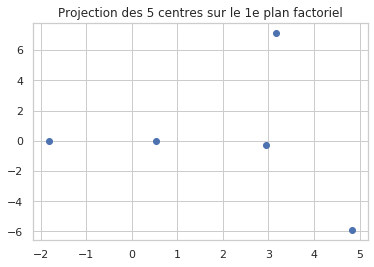

In [66]:
# Données projetées  
centroids_projected = pca.transform(centroids)

plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.savefig("Graphic/P9_08_kmeans_centroids.png")
plt.show()

--> Si on garde les centroides des 5 clusters on reconstitue un nouvel échantillon. On a ainsi un échantillon de **5 individus**. On a donc reduit les dimensions des données.

In [48]:
# Vérifier si tous les clusters sont pris en compte
df_cls5["Cluster"].unique()

array([0, 1, 2, 3, 4])

On affiche la liste des individus des 5 groupes

In [49]:
# Liste des pays du cluster 0
df_cls5[df_cls5['Cluster']==0]['Zone'].unique()

array(['Arménie', 'Nouvelle-Calédonie', 'République de Moldova', 'Maroc',
       'Mexique', 'Maurice', 'Malaisie', 'Liban', 'Monténégro',
       'Lettonie', 'République de Corée', 'Kirghizistan', 'Japon',
       'Jamaïque', 'Kazakhstan', "Iran (République islamique d')",
       'Indonésie', 'Croatie', 'Hongrie', 'Guyana', 'Grenade', 'Grèce',
       'Macédoine du Nord', 'Panama', 'Paraguay', 'Pologne', 'Serbie',
       'Samoa', 'Viet Nam', 'Venezuela (République bolivarienne du)',
       'Ouzbékistan', 'Uruguay', 'Ukraine', 'Turquie', 'Tunisie',
       'Trinité-et-Tobago', 'Kiribati', 'Thaïlande', 'Turkménistan',
       'Afrique du Sud', 'Slovaquie', 'Slovénie', 'Arabie saoudite',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie',
       'Saint-Kitts-et-Nevis', 'Fédération de Russie', 'Roumanie',
       'Chine, Taiwan Province de', 'Bosnie-Herzégovine',
       'République démocratique populaire lao', 'Barbade', 'Myanmar',
       'Dominique', 'Brésil', 'République dominicaine', 'A

In [50]:
# Liste des pays du cluster 1
df_cls5[df_cls5['Cluster']==1]['Zone'].unique()

array(['Sri Lanka', 'Pakistan', 'Cameroun', 'Cabo Verde',
       'République centrafricaine', 'Tchad', 'Guinée-Bissau', 'Zimbabwe',
       'Pérou', 'Timor-Leste', 'Sao Tomé-et-Principe', 'Philippines',
       'Rwanda', 'Gambie', 'Suriname', 'Sierra Leone', 'Afghanistan',
       'Zambie', 'Yémen', 'Éthiopie', 'Angola', 'Burkina Faso', 'Ouganda',
       'Bahamas', 'Oman', 'Togo', 'Bangladesh',
       'République-Unie de Tanzanie', 'Bolivie (État plurinational de)',
       'Botswana', 'Eswatini', 'Tadjikistan', 'Nigéria', 'Belize',
       'Îles Salomon', 'Sénégal', 'Niger', 'Nicaragua', 'Kenya', 'Bénin',
       'République populaire démocratique de Corée', 'Cambodge',
       'Jordanie', 'Équateur', "Côte d'Ivoire", 'Iraq', 'Inde',
       'Honduras', 'Haïti', 'Guinée', 'Guatemala', 'Djibouti', 'Gabon',
       'Ghana', 'Lesotho', 'Libéria', 'Soudan', 'Namibie', 'Madagascar',
       'Malawi', 'Mozambique', 'Vanuatu', 'Maldives', 'Mali', 'Népal',
       'Congo', 'Mongolie', 'Mauritanie'], dty

In [51]:
# Liste des pays du cluster 2
df_cls5[df_cls5['Cluster']==2]['Zone'].unique()

array(['Australie', 'Finlande', 'France', 'Lituanie', 'Islande',
       'Belgique', 'Luxembourg', 'Norvège', 'Chine - RAS de Hong-Kong',
       'Émirats arabes unis', 'Portugal', 'Chine - RAS de Macao',
       'Canada', 'Danemark', 'Koweït', 'Espagne', 'Autriche', 'Suède',
       'Allemagne', 'Malte', 'Italie', 'Israël', 'Irlande', 'Suisse',
       'Nouvelle-Zélande'], dtype=object)

In [52]:
# Liste des pays du cluster 3
df_cls5[df_cls5['Cluster']==3]['Zone'].unique()

array(['Pays-Bas'], dtype=object)

In [53]:
# Liste des pays du cluster 4
df_cls5[df_cls5['Cluster']==4]['Zone'].unique()

array(['Chine, continentale', "États-Unis d'Amérique"], dtype=object)

Pour selectionner les clusters, on fait une visualisation de la répartition des invidus au niveau de chquae variable avec un Box Plot

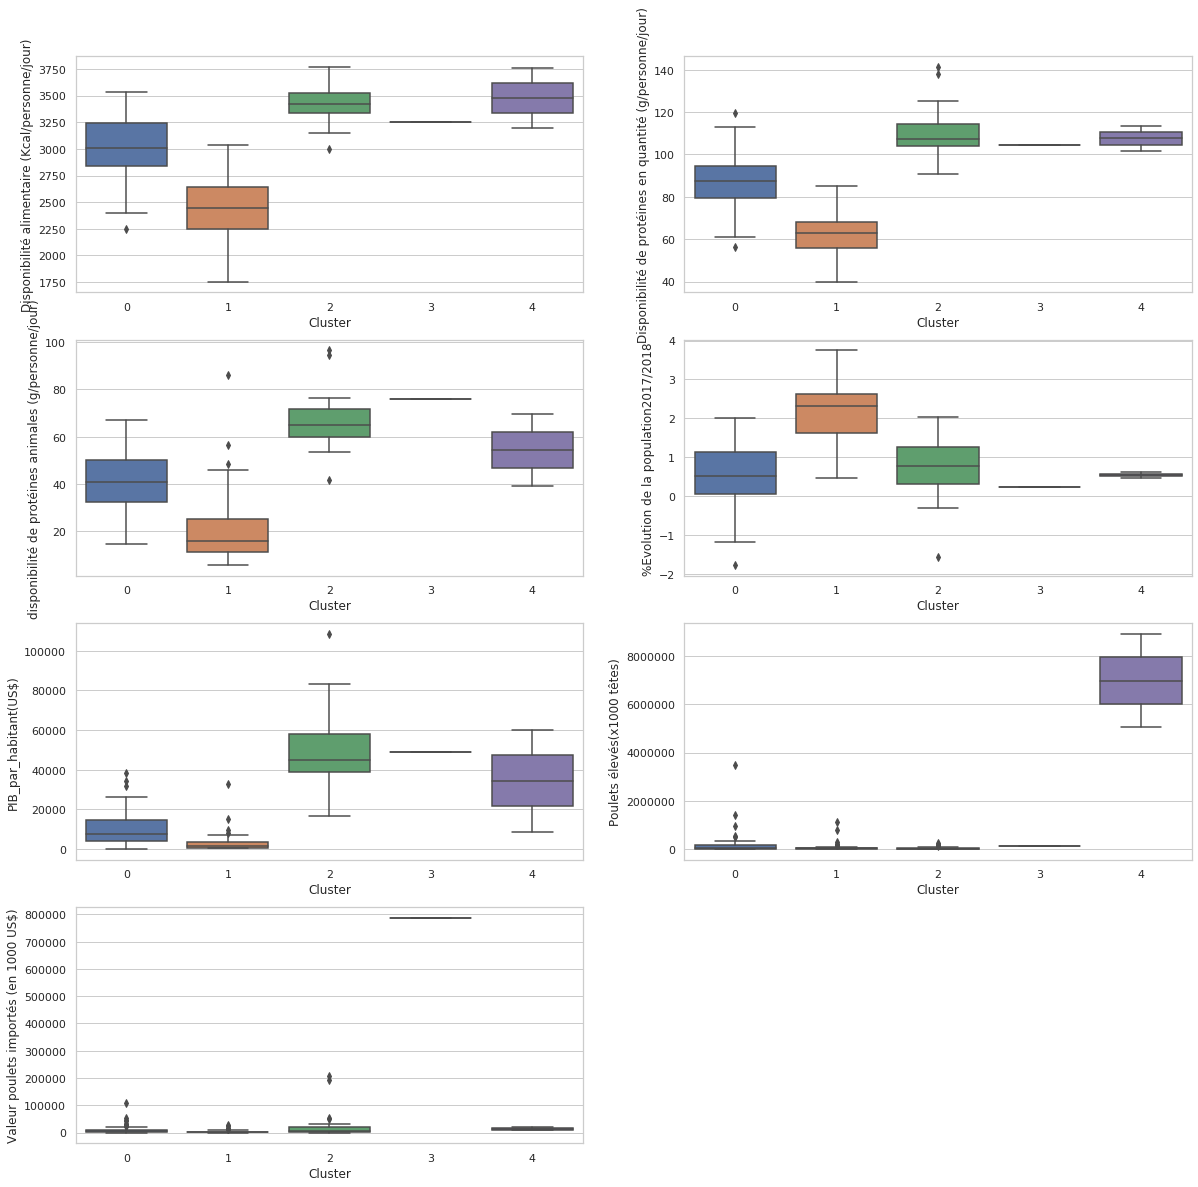

In [54]:
#Visualisation analytique avec boxplot
plt.figure(figsize = (20,20))
plt.title("boxplot_k-means")
sns.set(style='whitegrid')

plt.subplot(421)
sns.boxplot(data=df_cls5, x='Cluster', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(422)
sns.boxplot(data=df_cls5, x='Cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(423)
sns.boxplot(data=df_cls5, x='Cluster', y='disponibilité de protéines animales (g/personne/jour)')

plt.subplot(424)
sns.boxplot(data=df_cls5, x='Cluster', y='%Evolution de la population2017/2018')

plt.subplot(425)
sns.boxplot(data=df_cls5, x='Cluster', y='PIB_par_habitant(US$)')

plt.subplot(426)
sns.boxplot(data=df_cls5, x='Cluster', y='Poulets élevés(x1000 têtes)')

plt.subplot(427)
sns.boxplot(data=df_cls5, x='Cluster', y='Valeur poulets importés (en 1000 US$)')

plt.savefig("Graphic/P9_09_boxplot_k-means.png")
plt.show(block=False)

--> Les **clusters 2 et 3** ont les quantités moyennes les plus importantes en disponibilités alimentaires surtout en protéines animales et en PIB par habitant. 
On retient donc ces deux groupes. 

In [ ]:
#Afficher la liste des pays à partir des clusters retenus 
print(df_cls5[df_cls5['Cluster']== 2]['Zone'].unique())
print(df_cls5[df_cls5['Cluster']== 3]['Zone'].unique())

In [55]:
df_cls5 = df_cls5.query('[2,3] in Cluster')
df_cls5.shape

(26, 9)

In [56]:
#Observation des 5 premières lignes
df_cls5.head()

,Cluster,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$)
142,2,Australie,3307.0,108.01,71.69,1.259,57628.863849,95012.0,0.0
143,2,Finlande,3337.0,117.77,73.03,0.203,46310.120883,8520.0,1212.0
144,2,France,3556.0,112.08,69.34,0.228,38720.645922,244774.0,26061.0
145,2,Lituanie,3419.0,125.06,76.49,-1.576,16784.459812,9917.0,7609.0
146,2,Islande,3629.0,141.34,96.48,0.689,73231.725965,230.0,0.0


--> Avec le Clustering de K-means, on a **26 pays** qui sont éligibles pour exporter nos poulets. On remarque que le groupe 4 est constitué d'un seul individu:**Pays-Bas**

**Faisons un tableau de contingence pour comparer les groupes du clustering hierarchique avec les clusters du K-means.** 

In [57]:
pd.crosstab(groupe_clusters, cls5.labels_)

col_0,0,1,2,3,4
row_0,,,,,
1,4,67,0,0,0
2,0,0,23,0,0
3,0,0,0,1,0
4,1,0,0,0,2
5,69,1,2,0,0


--> Les groupes choisis pour le Clustering hierachique (CAH) sont 2 et 3. Pour le k-mean, les clusters 2 et 3. 

Pour le cluster 2 pour un total de 25 individus, on a **23 individus qui appartiennent autant au groupe 2 du CAH)**.
Pour le cluster 3, on a  **1  seul individus qui appartient autant au groupe 3 du CAH.** 

**Conclusion:**

Les deux méthodes de clustering nous on permis d'identifier les groupes restreints des pays ciblés pour nos exportations de poulets.

**La partition des pays peuvent être analysées avec les deux méthodes de clustering.** 


On peut visualiser la contribution de chaque variable à chaque composante pour encore mieux comprendre ces deux dimensions avec le cercle des correlations.

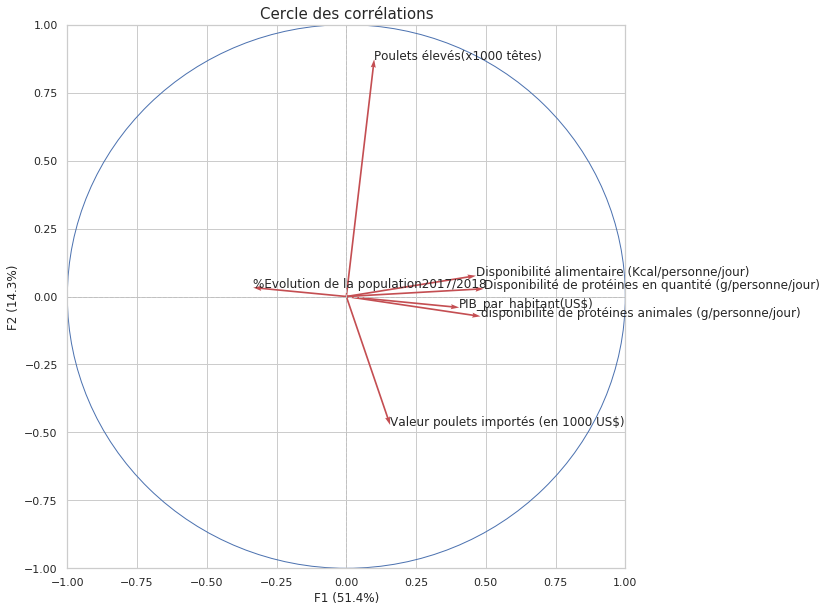

In [58]:
# Coordonnées des composantes principales
pcs = pca.components_

# Afficher sur un cercle la contribribution de chacune des variables initiales selon ses composantes principales
figure = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]),np.zeros(pcs.shape[1]),
          pcs[0,:], pcs[1,:],
          angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=15)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.savefig("Graphic/P9_10_cercle_correlation.png")
plt.show()


--> On remarque que:
- Une correlation entre les variables issu du régime alimentaire et le PIB par habitant. 
- Les variables du régime alimentaire et le PIB par habitant contribuent olus sur l'axe F1
- la variable % d'evolution de la population 2017/2018 contribue de façon négative sur l'axe F1.

**Les pays qui ont une valeur élévée en PIB et en disponibilités alimentaires ont un taux faible  d'évolution de la population.**

--> Sur l'axe F2
- les variables poulets élévés contribue le plus alors que la variable valeur poulet importés contribue le moins.

**Les pays qui élèvent plus de poulets importent peu.** 


In [59]:
#Calcul des composantes principales
X_projected = pca.transform(X_scaled)

In [60]:
facteurs_df = pd.DataFrame(X_projected, index= df.index, columns=["F" + str(i+1) for i in range(7)]).iloc[:,:2]

In [61]:
facteurs_df.head()

,F1,F2
Zone,,
Arménie,0.831310,-0.090509
Afghanistan,-2.736539,-0.301835
Albanie,2.192307,-0.061116
Algérie,0.083300,0.097631
Angola,-2.563544,-0.056471


In [62]:
#Coefficients de la composante principale F1
F1 = pca.components_[0]
print(F1) 
#Coefficients de la composante principale F2
F2 = pca.components_[1]
print(F2)

[ 0.46449157  0.49275301  0.48109242 -0.33399273  0.40468839  0.09988811
  0.15713263]
[ 0.07650641  0.02849925 -0.07307506  0.0327525  -0.04046737  0.87278982
 -0.47278134]


##### **Projection des individus des 5 clusters sur le premier plan factoriel(F1,F2)** 

On affiche le nom des individus des 5 clusters sur les deux premieres composantes. 

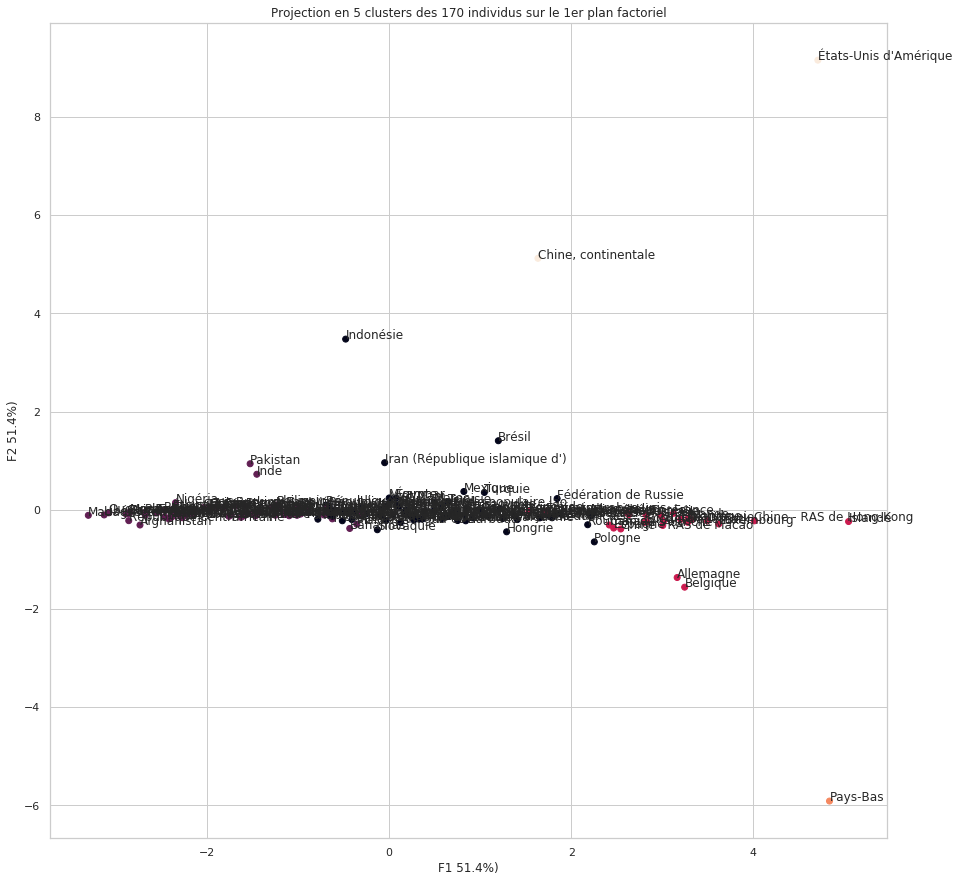

In [63]:
#Les coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(15,15))

plt.scatter(X_projected[:,0], X_projected[:,1], c=cls5.labels_)
for i, (x,y) in enumerate (X_projected[:, [0,1]]):
    plt.text(x,y, df.index[i])

plt.xlabel("F{} {}%)".format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel("F{} {}%)".format(2, round(100*pca.explained_variance_ratio_[0],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("Graphic/P9_11_projection_cluster_5.png")
plt.show()

--> On remarque qu'il ya 2 pays qui sont éloignés et se différencient des autres.Ce sont le **Pays-Bas** et les **Etats-Unis d'Amerique**. l'**Allemagne et la Belgique** sont très semblables. 

On projecte les individus sous forme de heatmap en fonction du classement final

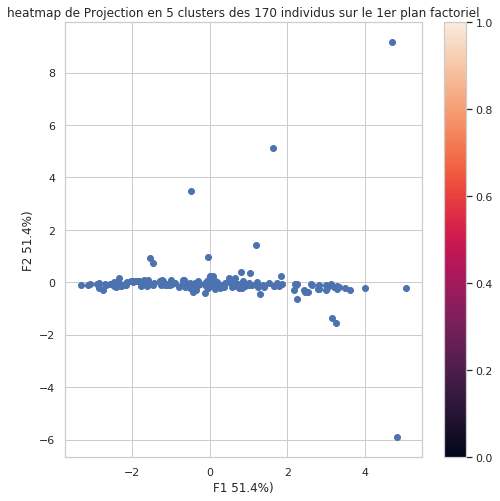

In [64]:
# Colorer chaque individu en fonction de son classsement final
plt.figure(figsize=(8,8))
plt.scatter(X_projected[:,0], X_projected[:,1], c=df_cls5.get('Rank'))
plt.xlabel("F{} {}%)".format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel("F{} {}%)".format(2, round(100*pca.explained_variance_ratio_[0],1)))
plt.title("heatmap de Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("Graphic/P9_12_heatmap_projection_cluster_5.png")
plt.colorbar()

--> Les pays qui ont un **PIB par habitant et des valeurs de disponibilité alimentaire élévés** ont un **taux d'évolution de population faible**.

--> Les **Etats Uni**s est le pays qui élèvent plus de poulets et importent peu. Alors que le **Pays-Bas** élève moins de poulets et importent plus. 

In [65]:
# Afficher la liste des 24 pays ciblés
#Caclcul de l'inertie totale
di = np.sum(X_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame(di, index=df.index, columns=['d_i']).sort_values(by='d_i', ascending=False)
ctr_indiv_inertie[:24]

,d_i
Zone,
Pays-Bas,154.665646
États-Unis d'Amérique,125.250961
"Chine, continentale",36.183559
Luxembourg,30.586626
Islande,30.484978
Chine - RAS de Hong-Kong,20.405560
Belgique,18.185073
Indonésie,17.185710
Lituanie,16.961957


--> L'objectif de l'entreprise est de vendre des poulets mais en minimisant les frais de transport, de conversion monetaire et de taxes. La France étant un pays appartenant à l'UE, nous allons privilégié les pays de l'UE.

Ainsi on recommande les pays de l'UE particulièrement **Pays-Bas, Belgique, Allemagne, Luxembourg, Danemark, Finlande et Lituanie** car plus proche de la France.